In [2]:
import pandas as pd
import glob
import numpy as np

path = r'C:\Users\xaa2cng\Documents\turning\202007\vibration' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
frame.shape

(134806335, 6)

In [3]:
frame.head()

,SN,num,time,x,y,z
0,20190227,35094,2020-07-09T16:00:02.708000Z,66,875,1108
1,20190227,35094,2020-07-09T16:00:02.708500Z,1539,373,1135
2,20190227,35094,2020-07-09T16:00:02.709000Z,517,26,308
3,20190227,35094,2020-07-09T16:00:02.709500Z,-1575,150,-531
4,20190227,35094,2020-07-09T16:00:02.710000Z,-1998,667,-619


In [4]:
frame['time'][-5:]

134806330    2020-07-11T22:50:06.674500Z
134806331    2020-07-11T22:50:06.675000Z
134806332    2020-07-11T22:50:06.675500Z
134806333    2020-07-11T22:50:06.676000Z
134806334    2020-07-11T22:50:06.676500Z
Name: time, dtype: object

In [5]:
my_tab = pd.crosstab(index=frame["num"],  # Make a crosstab
                              columns="count")      # Name the count column

In [4]:
frame_2 = frame[['num','x','y','z']]
frame_3 = frame_2.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

col_0,count
count,20040.000000
mean,6726.863024
std,560.412672
min,62.000000
25%,6792.750000
50%,6802.000000
75%,6802.000000
max,6819.000000


In [9]:
my_tab = pd.crosstab(index=frame["num"],  # Make a crosstab
          columns="count")      # Name the count column

In [10]:
my_tab.describe()

col_0,count
count,20040.000000
mean,6726.863024
std,560.412672
min,62.000000
25%,6792.750000
50%,6802.000000
75%,6802.000000
max,6819.000000


In [16]:
my_tab = pd.crosstab(index=frame_3["num"],  # Make a crosstab
          columns="count")  

In [17]:
my_tab.describe()

col_0,count
count,19835.000000
mean,6796.381699
std,48.754530
min,2627.000000
25%,6798.000000
50%,6802.000000
75%,6802.000000
max,6819.000000


In [20]:
sorted(my_tab['count'])

[2627,
 3131,
 3286,
 5454,
 6585,
 6616,
 6660,
 6674,
 6688,
 6694,
 6701,
 6705,
 6707,
 6736,
 6736,
 6737,
 6737,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6738,
 6739,
 6739,
 6739,
 6749,
 6749,
 6749,
 6750,
 6750,
 6750,
 6751,
 6751,
 6751,
 6751,
 6751,
 6751,
 6751,
 6752,
 6752,
 6752,
 6752,
 6752,
 6752,
 6752,
 6752,
 6752,
 6752,
 6752,
 6752,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6753,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,
 6754,

In [34]:
freqtable=my_tab[(my_tab['count']>6600)]

Text(0.5, 1.0, 'Histogram of the occurances for each product')

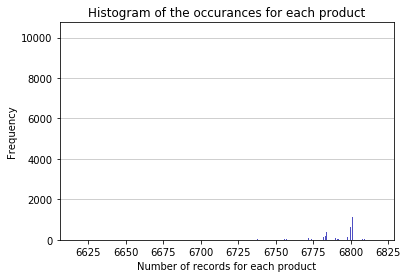

In [35]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=freqtable['count'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of records for each product')
plt.ylabel('Frequency')
plt.title('Histogram of the occurances for each product')

In [27]:
freqtable.describe()

col_0,count
count,19831.000000
mean,6797.021482
std,10.518214
min,6585.000000
25%,6798.000000
50%,6802.000000
75%,6802.000000
max,6819.000000


In [36]:
meanfeaturex=frame_3.groupby('num', as_index=False,sort=False)['x'].mean()
meanfeaturex.head()

,num,x
0,35094.0,-897.278807
1,35095.0,-893.808561
2,35096.0,-888.635569
3,35097.0,-889.436444
4,35098.0,-873.409612


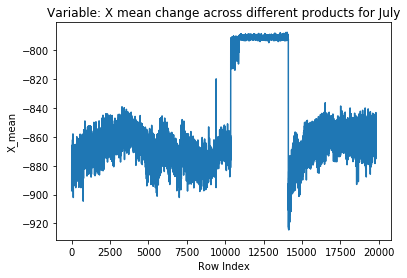

In [38]:
import matplotlib.pyplot as plt 
plt.plot(meanfeaturex['x'])
# naming the x axis 
plt.xlabel('Row Index') 
# naming the y axis 
plt.ylabel('X_mean')
# giving a title to my graph 
plt.title('Variable: X mean change across different products for July') 
# function to show the plot 
plt.show() 

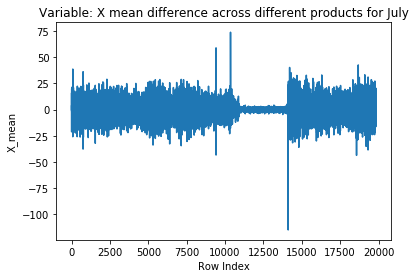

In [51]:
import matplotlib.pyplot as plt 
plt.plot(np.diff(meanfeaturex['x']))
# naming the x axis 
plt.xlabel('Row Index') 
# naming the y axis 
plt.ylabel('X_mean')
# giving a title to my graph 
plt.title('Variable: X mean difference across different products for July') 
# function to show the plot 
plt.show() 

In [59]:
np.where(np.diff(meanfeaturex['x'])==np.amax(np.diff(meanfeaturex['x'])))

(array([10357], dtype=int64),)

In [61]:
meanfeaturex[10355:10360]

,num,x
10355,45449.0,-876.718759
10356,45450.0,-860.718906
10357,45451.0,-871.962952
10358,45452.0,-797.968824
10359,45453.0,-797.549106


In [65]:
np.where(np.diff(meanfeaturex['x'])==np.amin(np.diff(meanfeaturex['x'])))

(array([14116], dtype=int64),)

In [66]:
meanfeaturex[14114:14118]

,num,x
14114,49208.0,-789.933696
14115,49209.0,-791.891681
14116,49210.0,-792.185060
14117,49211.0,-907.140841


In [67]:
meanfeaturex[14114:14119]

,num,x
14114,49208.0,-789.933696
14115,49209.0,-791.891681
14116,49210.0,-792.185060
14117,49211.0,-907.140841
14118,49212.0,-910.756248


In [63]:
frame[frame['num']=='45452']

,SN,num,time,x,y,z
70390026,20190227,45452,2020-07-10T23:30:42.776000Z,-1998.0,802.0,196.0
70390027,20190227,45452,2020-07-10T23:30:42.776500Z,-1998.0,1089.0,-539.0
70390028,20190227,45452,2020-07-10T23:30:42.777000Z,-1364.0,853.0,-1279.0
70390029,20190227,45452,2020-07-10T23:30:42.777500Z,-612.0,424.0,-1896.0
70390030,20190227,45452,2020-07-10T23:30:42.778000Z,0.0,411.0,-1881.0
70390031,20190227,45452,2020-07-10T23:30:42.778500Z,330.0,-99.0,-1254.0
70390032,20190227,45452,2020-07-10T23:30:42.779000Z,138.0,-38.0,-322.0
70390033,20190227,45452,2020-07-10T23:30:42.779500Z,-93.0,337.0,700.0
70390034,20190227,45452,2020-07-10T23:30:42.780000Z,-980.0,625.0,1629.0
70390035,20190227,45452,2020-07-10T23:30:42.780500Z,-1616.0,786.0,1998.0


In [98]:
frame[frame['num']=='45451']

,SN,num,time,x,y,z
70383223,20190227,45451,2020-07-10T23:24:36.550000Z,-1998.0,-172.0,-526.0
70383224,20190227,45451,2020-07-10T23:24:36.550500Z,-1122.0,-198.0,-426.0
70383225,20190227,45451,2020-07-10T23:24:36.551000Z,-930.0,-348.0,-94.0
70383226,20190227,45451,2020-07-10T23:24:36.551500Z,560.0,-26.0,338.0
70383227,20190227,45451,2020-07-10T23:24:36.552000Z,-244.0,81.0,593.0
70383228,20190227,45451,2020-07-10T23:24:36.552500Z,-198.0,523.0,468.0
70383229,20190227,45451,2020-07-10T23:24:36.553000Z,-1439.0,89.0,-98.0
70383230,20190227,45451,2020-07-10T23:24:36.553500Z,-1527.0,-54.0,4.0
70383231,20190227,45451,2020-07-10T23:24:36.554000Z,-1873.0,118.0,44.0
70383232,20190227,45451,2020-07-10T23:24:36.554500Z,-1506.0,268.0,321.0


In [96]:
frame[frame['num']==49211]

,SN,num,time,x,y,z
95941897,20190227,49211,2020-07-11T08:52:15.230000Z,-822,228,284
95941898,20190227,49211,2020-07-11T08:52:15.230500Z,-97,644,559
95941899,20190227,49211,2020-07-11T08:52:15.231000Z,223,41,391
95941900,20190227,49211,2020-07-11T08:52:15.231500Z,-1060,-180,-362
95941901,20190227,49211,2020-07-11T08:52:15.232000Z,-1635,241,-594
95941902,20190227,49211,2020-07-11T08:52:15.232500Z,-1998,336,-733
95941903,20190227,49211,2020-07-11T08:52:15.233000Z,-1115,-165,-907
95941904,20190227,49211,2020-07-11T08:52:15.233500Z,-1777,-54,-887
95941905,20190227,49211,2020-07-11T08:52:15.234000Z,-1998,-142,-785
95941906,20190227,49211,2020-07-11T08:52:15.234500Z,-434,-535,-197


In [97]:
frame[frame['num']==49210]

,SN,num,time,x,y,z
95935110,20190227,49210,2020-07-11T08:50:12.514000Z,-1998,1020,1998
95935111,20190227,49210,2020-07-11T08:50:12.514500Z,-1906,315,1998
95935112,20190227,49210,2020-07-11T08:50:12.515000Z,-913,196,1016
95935113,20190227,49210,2020-07-11T08:50:12.515500Z,611,391,-279
95935114,20190227,49210,2020-07-11T08:50:12.516000Z,1141,452,-1595
95935115,20190227,49210,2020-07-11T08:50:12.516500Z,605,721,-1998
95935116,20190227,49210,2020-07-11T08:50:12.517000Z,-804,979,-1998
95935117,20190227,49210,2020-07-11T08:50:12.517500Z,-1998,881,-1315
95935118,20190227,49210,2020-07-11T08:50:12.518000Z,-1998,868,-518
95935119,20190227,49210,2020-07-11T08:50:12.518500Z,-1626,706,190


In [99]:
frame[frame['num']==49212]

,SN,num,time,x,y,z
95948699,20190227,49212,2020-07-11T08:52:22.513000Z,-1053,41,-175
95948700,20190227,49212,2020-07-11T08:52:22.513500Z,-840,203,581
95948701,20190227,49212,2020-07-11T08:52:22.514000Z,533,1117,1238
95948702,20190227,49212,2020-07-11T08:52:22.514500Z,1931,221,1217
95948703,20190227,49212,2020-07-11T08:52:22.515000Z,-477,-301,-26
95948704,20190227,49212,2020-07-11T08:52:22.515500Z,-1998,341,-914
95948705,20190227,49212,2020-07-11T08:52:22.516000Z,-1998,705,-1159
95948706,20190227,49212,2020-07-11T08:52:22.516500Z,-1811,-183,-1693
95948707,20190227,49212,2020-07-11T08:52:22.517000Z,-1822,412,-1387
95948708,20190227,49212,2020-07-11T08:52:22.517500Z,-1998,-226,-1181


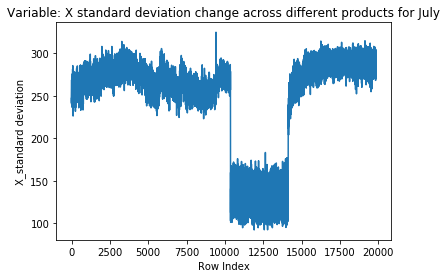

In [103]:
stdfeaturex=frame_3.groupby('num', as_index=False,sort=False)['x'].std()
plt.plot(stdfeaturex['x'])
# naming the x axis 
plt.xlabel('Row Index') 
# naming the y axis 
plt.ylabel('X_standard deviation')
# giving a title to my graph 
plt.title('Variable: X standard deviation change across different products for July') 
# function to show the plot 
plt.show() 

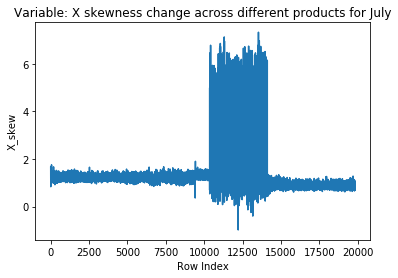

In [19]:
import math
skewfeaturex=frame_3.groupby('num', as_index=False,sort=False)['x'].skew()
plt.plot(skewfeaturex)
# naming the x axis 
plt.xlabel('Row Index') 
# naming the y axis 
plt.ylabel('X_skew')
# giving a title to my graph 
plt.title('Variable: X skewness change across different products for July') 
# function to show the plot 
plt.show() 

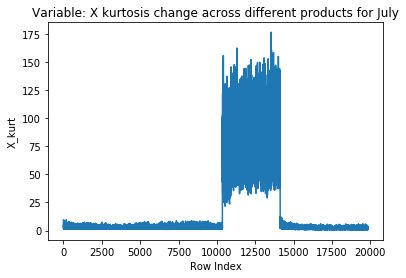

In [101]:
import math
kurtfeaturex=frame_3.groupby('num', as_index=False,sort=False)['x'].agg(lambda x: x.kurt())
plt.plot(kurtfeaturex['x'])
# naming the x axis 
plt.xlabel('Row Index') 
# naming the y axis 
plt.ylabel('X_kurt')
# giving a title to my graph 
plt.title('Variable: X kurtosis change across different products for July') 
# function to show the plot 
plt.show() 

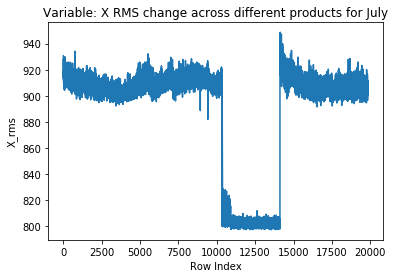

In [15]:
#np.sqrt(np.mean(y**2))
rmsfeaturex=frame_3.groupby('num', as_index=False,sort=False)['x'].agg(lambda x: np.sqrt(np.mean(x**2)))
plt.plot(rmsfeaturex['x'])
# naming the x axis 
plt.xlabel('Row Index') 
# naming the y axis 
plt.ylabel('X_rms')
# giving a title to my graph 
plt.title('Variable: X RMS change across different products for July') 
# function to show the plot 
plt.show() 

In [16]:
rmsfeaturex

,num,x
0,35094.0,930.663993
1,35095.0,927.153025
2,35096.0,921.184117
3,35097.0,921.734559
4,35098.0,912.664910
5,35099.0,926.324986
6,35100.0,927.127177
7,35101.0,915.757258
8,35102.0,925.983216
9,35103.0,912.573057


In [107]:
#np.sqrt(np.mean(y**2))
cffeaturex=frame_3.groupby('num', as_index=False,sort=False)['x'].agg(lambda x: max(x.min(), x.max(), key=abs)/np.mean(x))
plt.plot(cffeaturex['x'])
# naming the x axis 
plt.xlabel('Row Index') 
# naming the y axis 
plt.ylabel('X_cf')
# giving a title to my graph 
plt.title('Variable: Crest factor change across different products for July') 
# function to show the plot 
plt.show() 

MemoryError: 

In [6]:
import matplotlib.pyplot as plt 

In [8]:
minfeaturex=frame_3.groupby('num', as_index=False,sort=False)['x'].min()

In [9]:
maxfeaturex=frame_3.groupby('num', as_index=False,sort=False)['x'].max()

In [ ]:
maxfeaturex

In [13]:
minmaxdf = pd.DataFrame({'min':minfeaturex['x'], 'max':maxfeaturex['x']})

In [14]:
minmaxdf

,min,max
0,-1998.0,1998.0
1,-1998.0,1432.0
2,-1998.0,85.0
3,-1998.0,284.0
4,-1998.0,1433.0
5,-1998.0,325.0
6,-1998.0,1687.0
7,-1998.0,1861.0
8,-1998.0,1317.0
9,-1998.0,1419.0


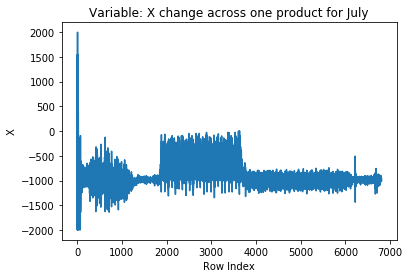

In [18]:
#np.sqrt(np.mean(y**2))
numind = 35094.0
subframe = frame_3[frame_3['num']==numind]
#rmsfeaturex=frame_3.groupby('num', as_index=False,sort=False)['x'].agg(lambda x: np.sqrt(np.mean(x**2)))
plt.plot(subframe['x'])
# naming the x axis 
plt.xlabel('Row Index') 
# naming the y axis 
plt.ylabel('X')
# giving a title to my graph 
plt.title('Variable: X change across one product for July') 
# function to show the plot 
plt.show() 

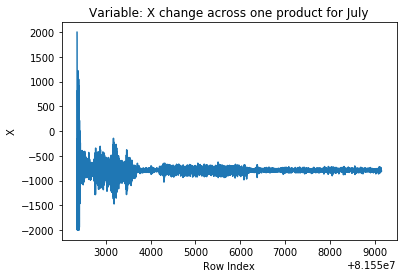

In [20]:
#np.sqrt(np.mean(y**2))
numind = 47094.0
subframe = frame_3[frame_3['num']==numind]
#rmsfeaturex=frame_3.groupby('num', as_index=False,sort=False)['x'].agg(lambda x: np.sqrt(np.mean(x**2)))
plt.plot(subframe['x'])
# naming the x axis 
plt.xlabel('Row Index') 
# naming the y axis 
plt.ylabel('X')
# giving a title to my graph 
plt.title('Variable: X change across one product for July (num=47094)') 
# function to show the plot 
plt.show() 

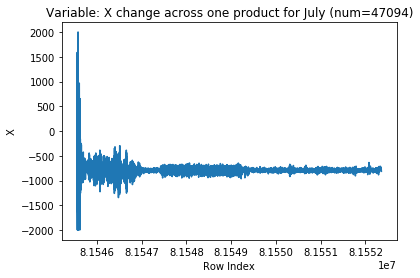

In [21]:
#np.sqrt(np.mean(y**2))
numind = 47093.0
subframe = frame_3[frame_3['num']==numind]
#rmsfeaturex=frame_3.groupby('num', as_index=False,sort=False)['x'].agg(lambda x: np.sqrt(np.mean(x**2)))
plt.plot(subframe['x'])
# naming the x axis 
plt.xlabel('Row Index') 
# naming the y axis 
plt.ylabel('X')
# giving a title to my graph 
plt.title('Variable: X change across one product for July (num=47094)') 
# function to show the plot 
plt.show() 